## <font color=red>  Exercise \#3: Making plots of Single-variable Spatial data </font>

## Total Points  : 50  
### <font color=Blue> Due: Tuesday 03/28/2023 11:59 PM </font>
#### Objective : Assess your ability to use Pandas Package to query and aggregate data of some rows and make simple plots for the data using MatPlotLib

##### Skills needed:  In this homework assignment, you'll be using the concepts you've learned to
1. Edit and run  Jupyter notebooks
2. Write Python code using Pandas to :
    * Use boolean masks to selet rows from the Panads dataframe
    * get aggregate of some column values
    * Normalize data in the range `[a,b]`
    * Create colors using normalized data and color maps
    * Use matPlotLib to plot the data
    

------
### <font color=darkorange> Type your name here: </font>

# Mehnaz Afrose

-----

## Requirements & Submission:
1. Use this notebook as a template for your answers. Then rename it as ` your first name`-`Last name-Ex3.ipynb`. 
2. Submit on WTClass __“Resources >> Tests, exercises and Quizzes >> Exercise\#3 __
3. Each task's answer must be given in the cells after the task description
4. Answers and explanations must be properly formatted in the appropriate Cell type
5. You can add as many cells as you needed
6. You should submit final ***clean version*** of your notebook, i.e. remove any experimenting cells

-------------
-------------

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading and cleaning the dataset

* For this Exercise you are required to use the attached `New York City Airbnb 2019` dataset. We are specifically interested in `room_type` and `price` columns  


In [51]:
#use na_values ='na' to instruct read_csv to replace `na` by `np.nan`
notclean = pd.read_csv("AB_NYC_2019.csv",na_values='na')

In [52]:
#verify the shape
notclean.shape

(48895, 16)

In [53]:
#see column labels
notclean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [54]:
#Check some rows
notclean[:5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


#### Let's see the columns with null in them, and how many nulls  are there in each column

In [55]:
notclean.isnull().sum()  

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### We are interested in `room_type`  and `price`  columns which have 0 missing values. So no further cleaning is needed 

----------

# Tasks: **<font color = purple> [50 points]</font> **

6+9
__Task 1: <font color = red> [30 points]</font>  -__ `room_type` is a categorical variable that specify the type of the rented property ( which takes on of these values :`'Entire home/apt', 'Private room', or 'Shared room'`). 
In this task you are going to create _One_ plot (Donut or stacked bar) that helps the viewer to visually compare the demand on each room_type (i.e. how many times each room type was rented). Your visual needs to compare percentages (part to whole), like pie, donut, or stacked-bar charts.
   * __Hint:__ To get the data for the plot you need to use a dataframe function/method that computes the frequency of each unique room_type value

__Task 2: <font color = red> [20 points]</font> -__ Create one visual to compare the average price of each room type. 
   * __Hint:__ To get the data for the plot you may use a loop that creates a mask for each room_type and then calculate the average, or use Pandas `.groupby()` method (to be covered later in week 13, but it is fairly easy to use)


__<font color = Blue> Notes:</font>__

   * Do not hard code the values needed for each plot. Use and show your python code to get the data form the dataframe above, then use the resulted data to make the plots.
   * It is up to you to choose the appropriate plot attributes like colors, sizes, ..., etc. The given output is just an example and you don't have to get the exect same output
   * Make One plot for each task
   * The grades of each task are distributed as follows: 
       * 50% points for correct extraction of the data
       * 50% points for the correct and complete visual
   
    

## <font color=Green> Task 1 Answer: </font>

For this task you may create a Donut chart __OR__ Stacked bar chrat like the ones below

##### Donut chart

1-<font color = red> [15 points]</font> Calculate the frequency of each room type

In [69]:
room_type_freq = notclean['room_type'].value_counts()
print(room_type_freq)


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


2- <font color = red> [15 points]</font> Make the Demand Plot

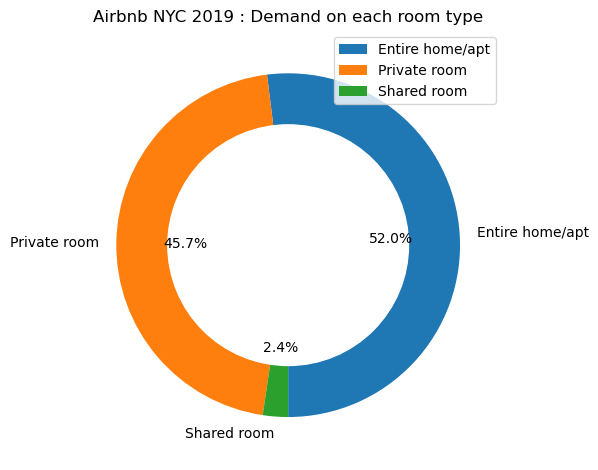

In [71]:
# Define data
labels = room_type_freq.index
sizes = room_type_freq.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=-90)

centre_circle = plt.Circle((0,0),0.7,color='white')
fig.gca().add_artist(centre_circle)

plt.title('Airbnb NYC 2019 : Demand on each room type')
plt.legend(labels, loc='best')

# Show plot
plt.tight_layout()
plt.show()


As you can see, `Entire home/apt` was reserved the most and the `Shared room` is the least

#### OR

##### Stacked bar

## <font color=Green> Task2 Answer: </font>

1-<font color = red> [10 points]</font> Calculate Average price of each room type

In [72]:
room_type_avg_price = notclean.groupby('room_type')['price'].mean()
print(room_type_avg_price)

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


2-<font color = red> [10 points]</font> Plot the averages

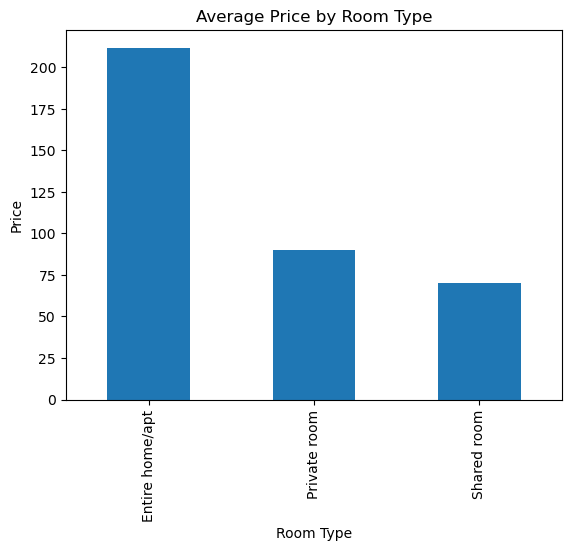

In [68]:
room_type_avg_price.plot(kind='bar')

plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

plt.show()